<a href="https://colab.research.google.com/github/JesusDavGarcia/MNIST_NaiveBayes/blob/main/MNIST_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Analysis Using Naive Bayes**

---

The purpose of this project is to Classify images of the MNIST database (*Modified National Institute of Standards and Technology*), which is made by a large dataset of handwritten digits that is commonly used for training various image processing systems, using a Naive Bayes Classifier algorithm.


### What is Naive Bayes?

Naive Bayes is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

Bayes' Theorem is mathematically stated as:

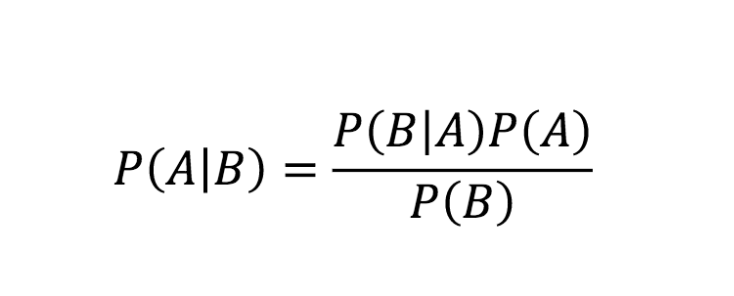

Where:
- \( P(A|B) \) is the probability of hypothesis \( A \) given the data \( B \). This is called the posterior probability.
- \( P(A) \) is the probability of hypothesis \( A \) being true. This is called the prior probability.
- \( P(B|A) \) is the probability of the data \( B \) given that the hypothesis \( A \) is true.
- \( P(B) \) is the probability of the data \( B \) being true.

Here’s a simple example: Let’s say we have a fruit basket with apples and oranges, and we know the characteristics of each fruit, such as color, size, and taste. If we pick a fruit randomly and it is yellow, we can use Naive Bayes to determine the probability that the fruit is an apple or an orange based on its color.

Applied to the MNIST database, the Naive Bayes classifier would look at each pixel in the image as a feature and try to determine the probability of a given image being a number from 0 to 9 based on the values of these pixels. For example, if a certain pixel is usually black for the number "1" and white for the number "0", this pixel would be a strong feature to distinguish between images of "1" and "0".

In this project, we are using the Gaussian Naive Bayes classifier, which assumes that the continuous values associated with each feature are distributed according to a Gaussian (normal) distribution. This assumption is particularly useful for classifying images, where pixel values can be treated as continuous data and can often be well-modeled by a Gaussian distribution.


## Load the Data

We have to first load the images of the MNIST database. Each image in this dataset is a 28 x 28 pixel grayscale image. Each pixel has a integer in the range [0, 255], where 0 represents black and 255 represents white. We can normalize this value to a range between [0,1], where 1 is the color white.

The MNIST dataset loaded using TensorFlow is already split into a training set and a test set. The Training set has 60,000 images, while the Test set has 10,000 images.

We can load the data as follows:

In [1]:
# Import TensorFlow
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Load the training and test data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Check the shape of the data
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


11490434/11490434 [==============================] - 0s 0us/step
Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


## Preprocess the data

In order to analyze the data, we will proceed by converting the images into a 1D Array of elements. The purpose of doing this is to have the image as a vector, and analyze the color of each individual pixel. The Naive Bayes will use this information (for example, given that this vector has a value of 1 in the first position, what is the chance it is the number 1?).

Since the images are 28 x 28, the 1D Array or vector will have 784 values, each value representing a pixel of the image.

In [2]:
# Reshape the images to 1D arrays (vectors)
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# Check the new shape of the data
print("Training Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)


Training Images Shape: (60000, 784)
Test Images Shape: (10000, 784)


## Train-Test Split

In a normal project, the next step would be to split the data into a training set and a test set. For this case, however, the data is already split when loaded from TensorFlow, so we will continue with training the model.

## Train the Model

We will train the model with the training set already loaded (train_images and train_labels). We will use the GaussianNB, which assumes that the class follows a Gaussian or Normal Distribution.

Training the model with the 60,000 images will allow it to detect patterns for each of the images. The model will be given the 1D Arrays or vectors for 60,000 images along its label. This way, it can calculate the conditional probabilities when given a new image (given this 1D Array or vector, what is chance it is X number?).

In [3]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create an instance of the GaussianNB class
model = GaussianNB()

# Fit the model to the training data
model.fit(train_images, train_labels)

# Make predictions on the test data
predictions = model.predict(test_images)

# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predictions)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.5558


Testing the model against the test_images, we obtain an accuracy of 55.58%. This means that the model can accurately classify an image 55.58% of the times. Let´s see some image examples along with the classification of the model:

#### Examples:

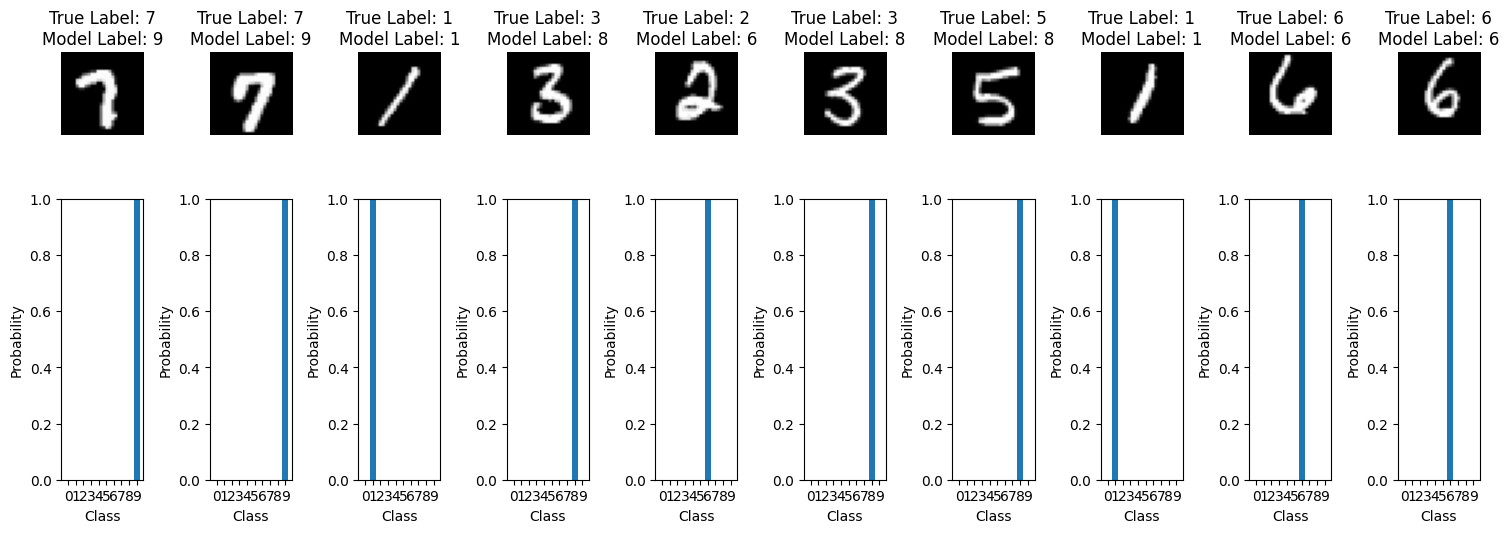

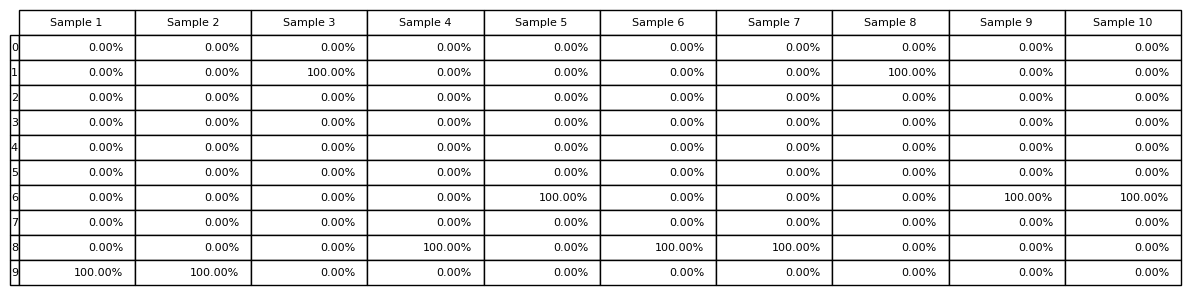

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random samples to display
num_samples = 10

# Initialize the figure for images and bar plots
fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

# Store class probabilities and predicted labels for all samples
all_class_probabilities = []
all_predicted_labels = []

# Loop over the number of samples
for i in range(num_samples):
    # Randomly choose an index from the test set
    random_index = np.random.randint(len(test_images))

    # Select the corresponding image and label
    selected_image = test_images[random_index].reshape(1, -1)
    true_label = test_labels[random_index]

    # Use the trained model to predict the class probabilities and label for the selected image
    class_probabilities = model.predict_proba(selected_image)
    predicted_label = model.predict(selected_image)
    all_class_probabilities.append(class_probabilities[0])
    all_predicted_labels.append(predicted_label[0])

    # Display the selected image
    ax = axes[0, i]
    ax.imshow(selected_image.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"True Label: {true_label}\nModel Label: {predicted_label[0]}")

    # Display the class probabilities as a bar plot
    ax = axes[1, i]
    ax.bar(range(10), class_probabilities[0])
    ax.set_xticks(range(10))
    ax.set_ylim(0, 1)
    ax.set_ylabel("Probability")
    ax.set_xlabel("Class")

plt.tight_layout()
plt.show()

# Initialize the figure for the table
fig, ax = plt.subplots(figsize=(15, 1))

# Display the class probabilities as a table
ax.axis('off')
table_data = np.array(all_class_probabilities).T
table_data = [[f"{prob*100:.2f}%" for prob in row] for row in table_data]
table = ax.table(cellText=table_data, rowLabels=range(10), colLabels=[f"Sample {i+1}" for i in range(num_samples)], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)

plt.show()





From this 10 examples it is possible to see that the model misses for several values and accurately classifies some of them.

## Evaluate the Model

We already know the accuracy of the model, but let´s check for other metrics:

In [5]:
import pandas as pd
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

# Get the classification report as a dictionary
report_dict = classification_report(test_labels, predictions, output_dict=True)

# Convert the classification report to a DataFrame and then to a pretty table
report_df = pd.DataFrame(report_dict).transpose()
print("Classification Report:")
print(tabulate(report_df, headers='keys', tablefmt='grid'))

# Get the confusion matrix and convert it to a pretty table
conf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(tabulate(conf_matrix, tablefmt='grid'))

# Create explanation tables
classification_report_explanation = [
    ["Precision", "The ratio of correctly predicted positive observations to the total predicted positives."],
    ["Recall (Sensitivity)", "The ratio of correctly predicted positive observations to the all observations in actual class."],
    ["F1 Score", "The weighted average of Precision and Recall."],
    ["Support", "The number of actual occurrences of the class in the specified dataset."],
    ["Macro Avg", "The average of the unweighted mean per label."],
    ["Weighted Avg", "The average of the weighted mean per label."]
]

print("Classification Report Explanation:")
print(tabulate(classification_report_explanation, headers=['Term', 'Explanation'], tablefmt='grid'))




Accuracy: 0.5558
Classification Report:
+--------------+-------------+-----------+------------+------------+
|              |   precision |    recall |   f1-score |    support |
+==============+=============+===========+============+============+
| 0            |    0.790191 | 0.887755  |   0.836136 |   980      |
+--------------+-------------+-----------+------------+------------+
| 1            |    0.845611 | 0.950661  |   0.895064 |  1135      |
+--------------+-------------+-----------+------------+------------+
| 2            |    0.904762 | 0.257752  |   0.401207 |  1032      |
+--------------+-------------+-----------+------------+------------+
| 3            |    0.708835 | 0.349505  |   0.46817  |  1010      |
+--------------+-------------+-----------+------------+------------+
| 4            |    0.884211 | 0.171079  |   0.286689 |   982      |
+--------------+-------------+-----------+------------+------------+
| 5            |    0.55     | 0.0493274 |   0.090535 |   892  

####Interpretation:

**Class 0:**

Precision: 79.02% - Of all instances predicted as class 0, 79.02% are actually class 0.

Recall: 88.78% - Of all actual instances of class 0, 88.78% were correctly identified by the model.

F1-Score: 83.61% - The harmonic mean of precision and recall, indicating a balance between the two.

Checking for the other classes or numbers, we can see that the model has a low F1-Score for the numbers 2,4,5,8. It is quite good for classifying the numbers 0 and 1.


Macro Avg: The average of the unweighted mean per label.

Precision: 68.65%
Recall: 54.84%
F1-Score: 50.90%
Weighted Avg: The average of the weighted mean per label.

Precision: 69.17%
Recall: 55.58%
F1-Score: 51.70%

The overall accuracy of the model is 55.58%, which is not very high. The macro and weighted averages also provide insights into the unbalanced performance across different classes. Classes like 2, 4, 5, and 8 are particularly challenging for the model, and improvements are needed for these classes to enhance overall performance.



The confusion matrix can be read as follows:

 ⟹ first row of this matrix corresponds to the digit 0. The first value in this row, 870, represents the True Positive (TP) for the digit 0, meaning 870 instances of 0 were correctly predicted as 0. The rest of the values in this row are the False Negatives (FN) for the digit 0, meaning these instances were 0 but were incorrectly predicted as other digits. For example, 35 instances of 0 were incorrectly predicted as 8.

 ⟹ The second row corresponds to the digit 1. The value 1079 at the intersection of the second row and the second column is the TP for the digit 1, meaning 1079 instances of 1 were correctly predicted as 1. The rest of the values in this row are the FN for the digit 1.

 ⟹ Similarly, each subsequent row corresponds to the digits 2 through 9, with the diagonal values representing the TP for each digit, and the off-diagonal values representing the FN.

 ⟹ Each column represents the instances in an actual class. For example, the first column represents all instances that are actually 0. The value 870 in the first column and the first row is the TP for 0, and the rest of the values in this column are the False Positives (FP) for 0, meaning these instances were not 0 but were incorrectly predicted as 0.

 ⟹ The last value in the last column and last row, 955, is the TP for the digit 9, meaning 955 instances of 9 were correctly predicted as 9.

## Compared To Another Model...

Given the relatively low accuracy of the Naive Bayes Classification method, we  could try another model to see how accuracy compares. The following is the implementation of another method, via Random Forest Classification:

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(train_images, train_labels)

# Make predictions and calculate accuracy
rf_predictions = rf_model.predict(test_images)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print("Random Forest Model Accuracy:", rf_accuracy)


Random Forest Model Accuracy: 0.9704


The accuracy of the new model is 97.04%, quite higher than the Naive Bayes one. Let´s see some examples as we did earlier:

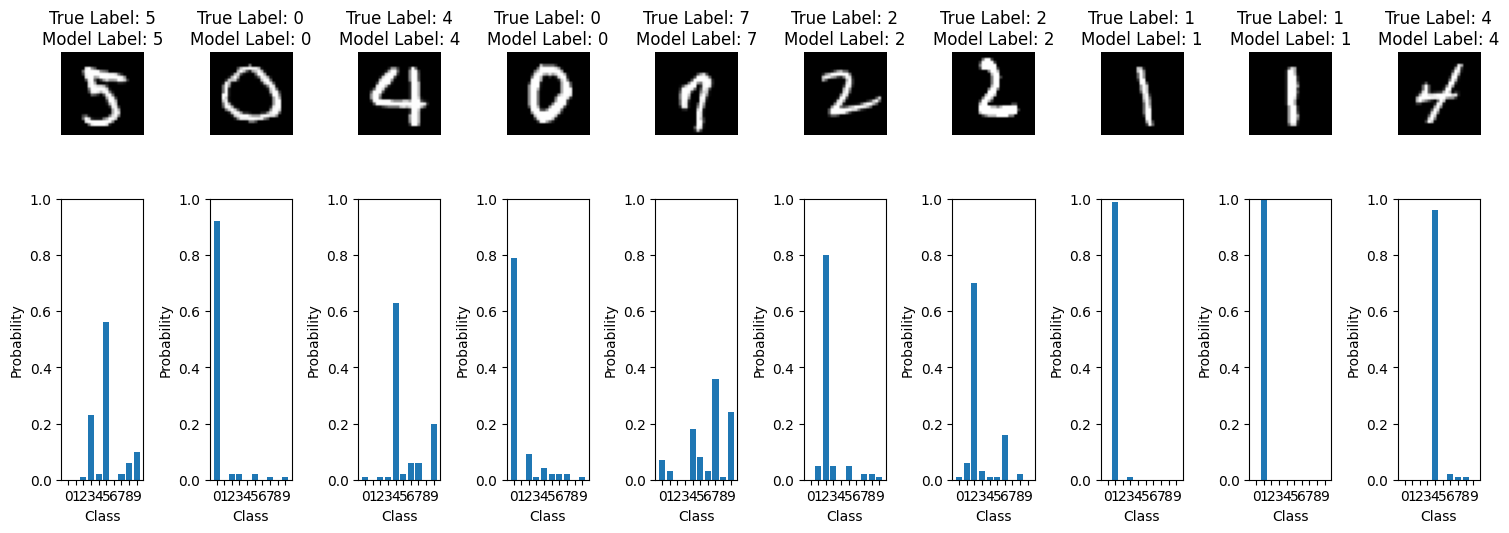

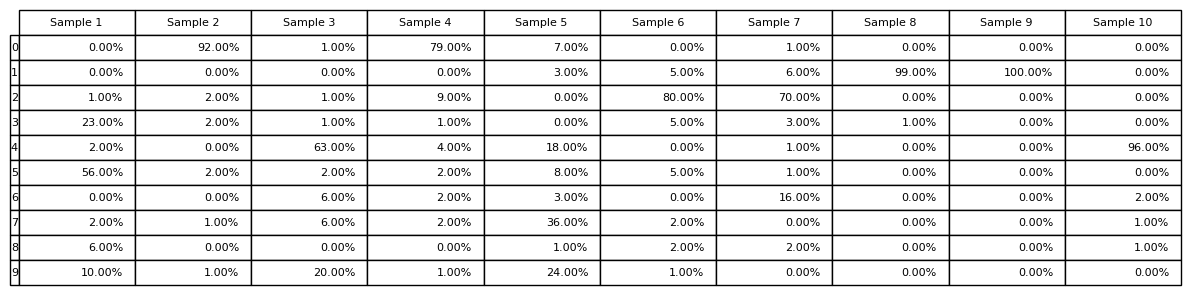

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random samples to display
num_samples = 10

# Initialize the figure for images and bar plots
fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

# Store class probabilities and predicted labels for all samples
all_class_probabilities = []
all_predicted_labels = []

# Loop over the number of samples
for i in range(num_samples):
    # Randomly choose an index from the test set
    random_index = np.random.randint(len(test_images))

    # Select the corresponding image and label
    selected_image = test_images[random_index].reshape(1, -1)
    true_label = test_labels[random_index]

    # Use the trained Random Forest model to predict the class probabilities and label for the selected image
    class_probabilities = rf_model.predict_proba(selected_image)
    predicted_label = rf_model.predict(selected_image)
    all_class_probabilities.append(class_probabilities[0])
    all_predicted_labels.append(predicted_label[0])

    # Display the selected image
    ax = axes[0, i]
    ax.imshow(selected_image.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"True Label: {true_label}\nModel Label: {predicted_label[0]}")

    # Display the class probabilities as a bar plot
    ax = axes[1, i]
    ax.bar(range(10), class_probabilities[0])
    ax.set_xticks(range(10))
    ax.set_ylim(0, 1)
    ax.set_ylabel("Probability")
    ax.set_xlabel("Class")

plt.tight_layout()
plt.show()

# Initialize the figure for the table
fig, ax = plt.subplots(figsize=(15, 1))

# Display the class probabilities as a table
ax.axis('off')
table_data = np.array(all_class_probabilities).T
table_data = [[f"{prob*100:.2f}%" for prob in row] for row in table_data]
table = ax.table(cellText=table_data, rowLabels=range(10), colLabels=[f"Sample {i+1}" for i in range(num_samples)], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)

plt.show()



From this sample of 10 images, it is possible to see that the accuracy of the Random Forest model is quite high! It doesn´t have as much trouble with digits 2,5,7, and 8 as previously.

## Creating a New Digit

To produce a new digit, we will use a Variational Autoencoder (VAE). VAE works by "combining two distinct kinds of neural networks that operate differently. In the case of VAEs, one network finds better ways of encoding raw data into a latent space, while the second -- the decoder -- finds better ways of transforming these latent representations into new content." (https://shorturl.at/bhESW).

Naive Bayes might not be as good as VAE for these reasons:

**Generative Model:**

*VAE:* A VAE is a generative model, meaning it is designed to generate new data samples that resemble a given dataset. It learns a continuous latent representation of the data, allowing for the generation of new, similar samples by sampling from the latent space and decoding.
*Naive Bayes:* Naive Bayes is a discriminative model used for classification tasks. It estimates the probability of a class given the features but does not model the distribution of the data itself, making it unsuitable for generating new data samples.
Complexity and Expressiveness:

*VAE:* VAEs are capable of modeling complex, high-dimensional data distributions, such as images, by learning a non-linear mapping between the data space and the latent space. This makes them well-suited for generating realistic images.
*Naive Bayes: *Naive Bayes makes a strong independence assumption between features, which limits its ability to capture complex dependencies between pixels in an image. This makes it less suitable for generating high-quality images.

The implementation of VAE is as follows:

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

# VAE parameters
original_dim = 784
intermediate_dim = 256
latent_dim = 2

# Encoder
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

# Sampling from the latent space
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(inputs, x_decoded_mean)

# Define the decoder model
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
decoder = Model(decoder_input, _x_decoded_mean)

# Loss
xent_loss = original_dim * binary_crossentropy(inputs, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

# Compile and train the model
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.fit(train_images, train_images, epochs=50, batch_size=100, validation_data=(test_images, test_images))



Epoch 1/50
600/600 [==============================] - 7s 10ms/step - loss: 187.5646 - val_loss: 167.1629
Epoch 2/50
600/600 [==============================] - 7s 11ms/step - loss: 164.6436 - val_loss: 163.2099
Epoch 3/50
600/600 [==============================] - 6s 10ms/step - loss: 161.6037 - val_loss: 160.7590
Epoch 4/50
600/600 [==============================] - 8s 14ms/step - loss: 159.4659 - val_loss: 158.8369
Epoch 5/50
600/600 [==============================] - 6s 10ms/step - loss: 157.7876 - val_loss: 157.6574
Epoch 6/50
600/600 [==============================] - 7s 11ms/step - loss: 156.3333 - val_loss: 156.3236
Epoch 7/50
600/600 [==============================] - 6s 10ms/step - loss: 155.0070 - val_loss: 154.7663
Epoch 8/50
600/600 [==============================] - 7s 11ms/step - loss: 153.9091 - val_loss: 153.7549
Epoch 9/50
600/600 [==============================] - 6s 10ms/step - loss: 153.0160 - val_loss: 153.0186
Epoch 10/50
600/600 [==============================] - 

1/1 [==============================] - 0s 55ms/step


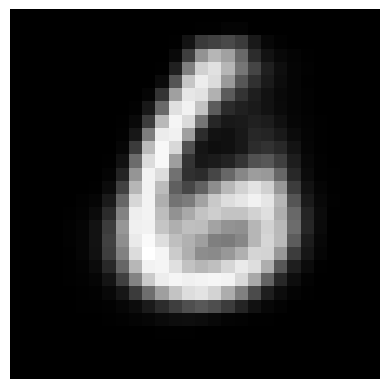

In [9]:


# Encode the training images to the latent space
encoder = Model(inputs, z_mean)
x_encoded = encoder.predict(train_images, batch_size=100)





def generate_digit_image(digit):
    # Ensure the input digit is valid
    if digit < 0 or digit > 9:
        print("Invalid digit. Please enter a digit between 0 and 9.")
        return

    # Select the encoded points corresponding to the input digit
    encoded_digits = x_encoded[train_labels == digit]

    # Compute the mean of the encoded points for the input digit
    mean_encoded_digit = np.mean(encoded_digits, axis=0)

    # Decode the mean encoded point to generate a new image of the digit
    generated_image = decoder.predict(mean_encoded_digit.reshape(1, -1)).reshape(28, 28)

    # Display the generated image
    plt.imshow(generated_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Call the function with the desired digit
generate_digit_image(6)


Repeating this step for all numbers will produce the following images:

1/1 [==============================] - 0s 21ms/step


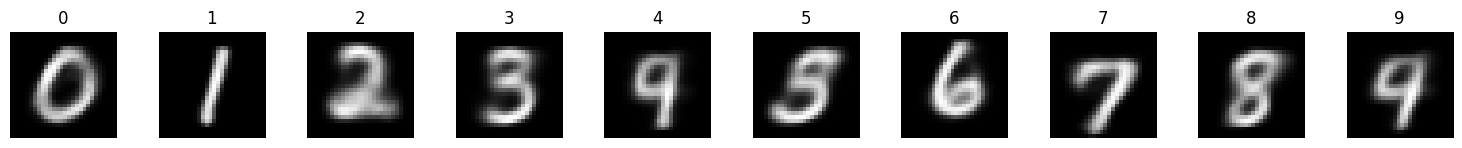

In [10]:
def generate_digit_image(digit):
    # Ensure the input digit is valid
    if digit < 0 or digit > 9:
        print("Invalid digit. Please enter a digit between 0 and 9.")
        return None

    # Select the encoded points corresponding to the input digit
    encoded_digits = x_encoded[train_labels == digit]

    # Compute the mean of the encoded points for the input digit
    mean_encoded_digit = np.mean(encoded_digits, axis=0)

    # Decode the mean encoded point to generate a new image of the digit
    generated_image = decoder.predict(mean_encoded_digit.reshape(1, -1)).reshape(28, 28)

    return generated_image

# Initialize the plot
fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))

# Generate and display images for each digit from 0 to 9
for digit in range(10):
    img = generate_digit_image(digit)
    ax = axes[digit]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(str(digit))

plt.tight_layout()
plt.show()
